# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error,r2_score


Learned coefficient : [1.95840572]
Learned intercept : 4.577033020184899
 Train MAE : 7.721551813688888
 Train MSE : 94.40400600486683
 Train R2 : 0.9722242367327886
 Test MAE : 6.714067937567324
 Test MSE : 75.9705316040523
 Test R2 : 0.975167853962951


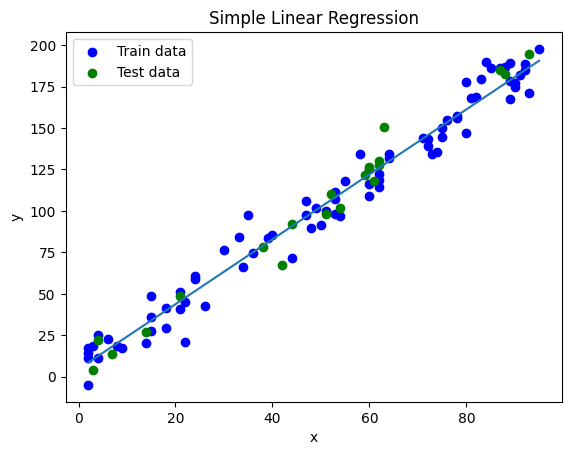

In [3]:
np.random.seed(42)
x=np.random.randint(1,100,100)
y=2*x+3+np.random.randn(100)*10

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=LinearRegression()

model.fit(X_train.reshape(-1,1),y_train)

print("Learned coefficient :", model.coef_)
print("Learned intercept :", model.intercept_)

y_train_pred=model.predict(X_train.reshape(-1,1))
y_test_pred=model.predict(X_test.reshape(-1,1))

print(f" Train MAE : {mean_absolute_error(y_train,y_train_pred)}")
print(f" Train MSE : {mean_squared_error(y_train,y_train_pred)}")
print(f" Train R2 : {r2_score(y_train,y_train_pred)}")
print(f" Test MAE : {mean_absolute_error(y_test,y_test_pred)}")
print(f" Test MSE : {mean_squared_error(y_test,y_test_pred)}")
print(f" Test R2 : {r2_score(y_test,y_test_pred)}")

plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Test data')

x_sort=np.sort(x)
y_poly=model.predict(x_sort.reshape(-1,1))

plt.plot(x_sort,y_poly)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Simple Linear Regression')
plt.show()

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [4]:
np.random.seed(42)
x1=np.random.randint(0,100,100)
x2=np.random.randint(0,100,100)

y=2*x1+3*x2+3 + np.random.randn(100) *10

X=np.column_stack((x1,x2))


x_train,X_test,y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(x_train,y_train)

print("Learned coefficient :", model.coef_)
print("Learned intercept :", model.intercept_)

y_train_pred=model.predict(x_train)
y_test_pred=model.predict(X_test)

print(f" Train MAE : {mean_absolute_error(y_train,y_train_pred)}")
print(f" Train MSE : {mean_squared_error(y_train,y_train_pred)}")
print(f" Train R2 : {r2_score(y_train,y_train_pred)}")
print(f" Test MAE : {mean_absolute_error(Y_test,y_test_pred)}")
print(f" Test MSE : {mean_squared_error(Y_test,y_test_pred)}")
print(f" Test R2 : {r2_score(Y_test,y_test_pred)}")



Learned coefficient : [2.04610016 2.95399815]
Learned intercept : 3.380846445095557
 Train MAE : 7.4433224458548555
 Train MSE : 87.34907137163668
 Train R2 : 0.9935105309643364
 Test MAE : 7.388604874928802
 Test MSE : 94.0977363231207
 Test R2 : 0.9870478313486267


# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



Learned coefficient : [0.         1.88774745 3.00121746]
Learned intercept : 4.512926792103826
 Train MAE : 7.203614004353287
 Train MSE : 85.80805318038384
 Train R2 : 0.999998879583155
 Test MAE : 7.6687682328120275
 Test MSE : 84.73460599293868
 Test R2 : 0.9999987807880998


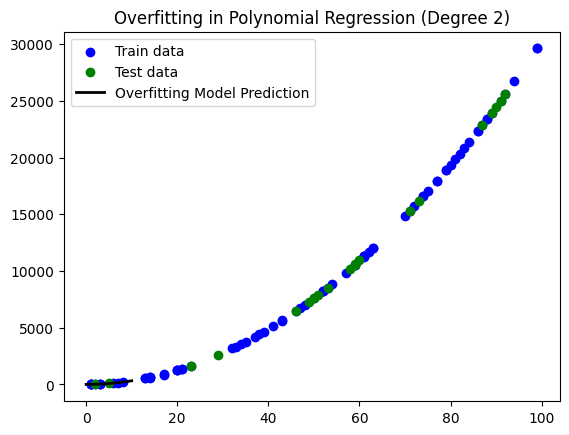

In [5]:
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(42)
x=np.random.randint(0,100,100)
y=3*x**2+2*x+3 + np.random.randn(100)*10

x_train,X_test,y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

poly_feature=PolynomialFeatures(degree=2)
x_train_poly=poly_feature.fit_transform(x_train.reshape(-1,1))
x_test_poly=poly_feature.transform(X_test.reshape(-1,1))

model=LinearRegression()
model.fit(x_train_poly,y_train)

print("Learned coefficient :", model.coef_)
print("Learned intercept :", model.intercept_)

y_train_pred=model.predict(x_train_poly)
y_test_pred=model.predict(x_test_poly)


print(f" Train MAE : {mean_absolute_error(y_train,y_train_pred)}")
print(f" Train MSE : {mean_squared_error(y_train,y_train_pred)}")
print(f" Train R2 : {r2_score(y_train,y_train_pred)}")
print(f" Test MAE : {mean_absolute_error(Y_test,y_test_pred)}")
print(f" Test MSE : {mean_squared_error(Y_test,y_test_pred)}")
print(f" Test R2 : {r2_score(Y_test,y_test_pred)}")

plt.scatter(x_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, Y_test, color='green', label='Test data')

X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
X_plot_poly = poly_feature.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.plot(X_plot, y_plot, color='black', linewidth=2, label='Overfitting Model Prediction')
plt.title("Overfitting in Polynomial Regression (Degree 2)")
plt.legend()
plt.show()

## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



# Data 

In [6]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

/Users/belalmohsen/ml-projects/ml-env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/belalmohsen/.cache/kagglehub/datasets/rohitgrewal/airlines-flights-data/versions/1


In [7]:
os.listdir(path)

['airlines_flights_data.csv']

In [8]:
full_path = os.path.join(path,os.listdir(path)[0])

In [9]:
import pandas as pd
df = pd.read_csv(full_path)

In [10]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# EDA

## just checking the data

In [11]:
df.head(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [12]:
# Inspect dataset structure (`.info()`, `.describe()`)
# Check for missing values and duplicates
# Understand feature types (numeric, categorical, datetime, etc.)
# Visualize data distributions (histograms, boxplots, bar charts)
# Identify correlations between features and target
# Detect outliers and anomalies

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [14]:
df.shape

(300153, 12)

In [37]:
df['flight'].unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], shape=(1561,), dtype=object)

In [16]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [17]:
df[df.duplicated()]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [18]:
df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## visualizing the data

```python

### Duaration Dist

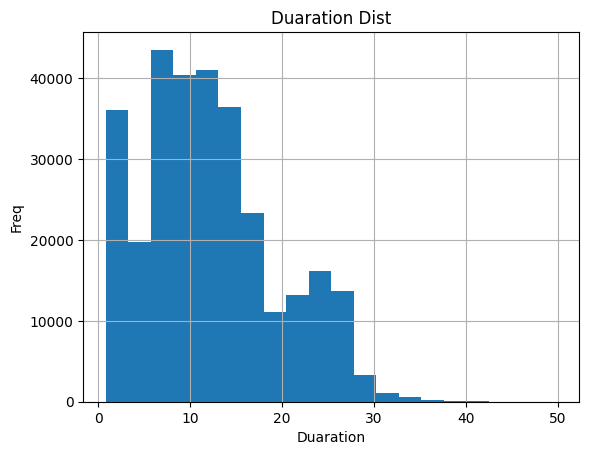

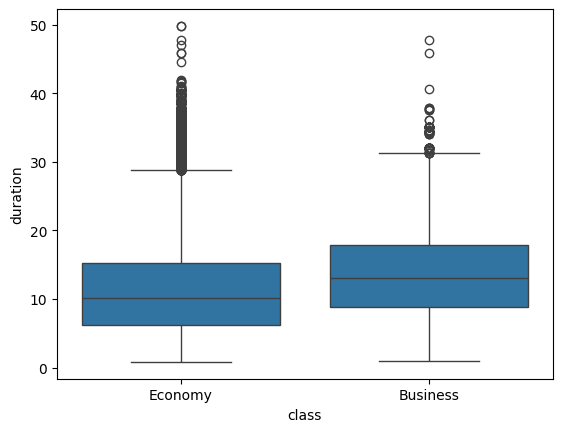

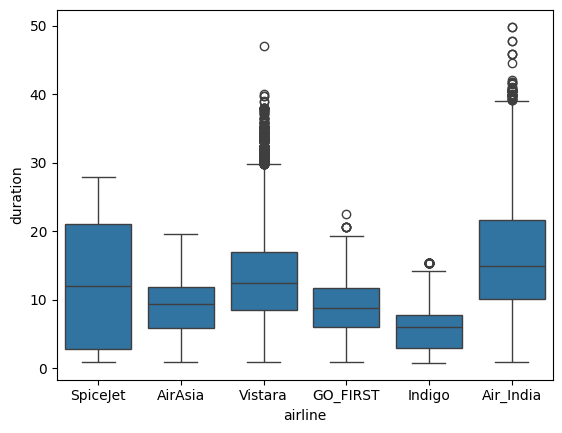

In [19]:
 
import matplotlib.pyplot as plt
import seaborn as sns

df['duration'].hist(bins=20)
plt.title("Duaration Dist")
plt.xlabel("Duaration")
plt.ylabel("Freq")
plt.show()

sns.boxplot(x=df['class'],y=df['duration'])
plt.show()

sns.boxplot(x=df['airline'],y=df['duration'])
plt.show()




### price Dist

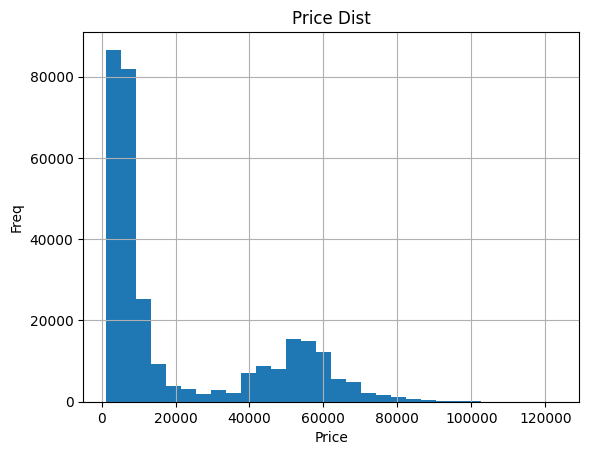

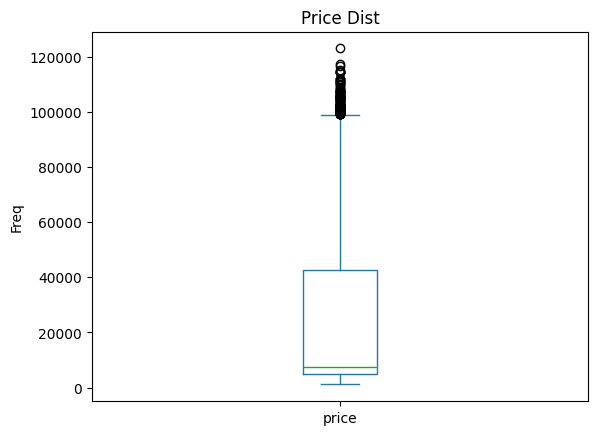

In [20]:
df['price'].hist(bins=30)
plt.title("Price Dist")
plt.xlabel("Price")
plt.ylabel("Freq")
plt.show()

df['price'].plot(kind='box')
plt.title("Price Dist")
plt.ylabel("Freq")
plt.show()


### days_left Dist

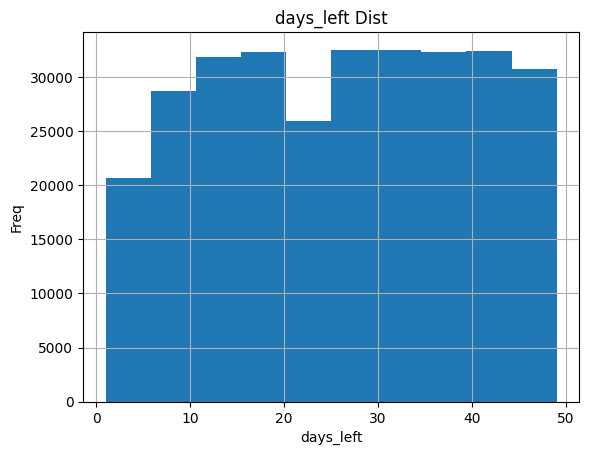

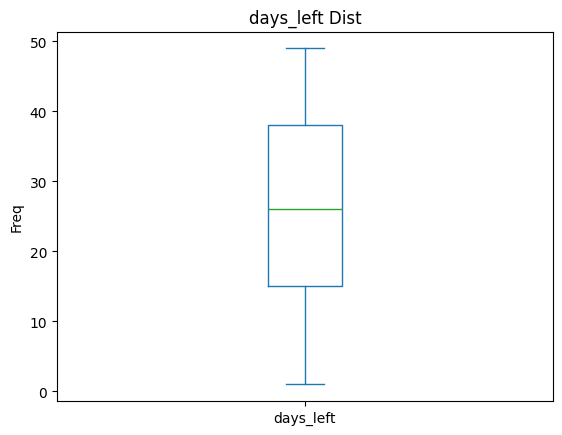

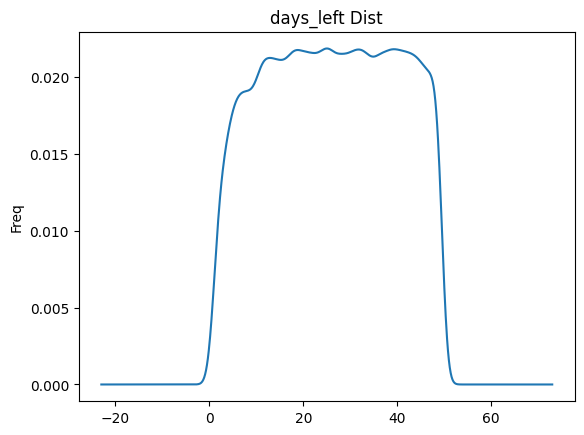

In [21]:
df['days_left'].hist(bins=10)
plt.title("days_left Dist")
plt.xlabel("days_left")
plt.ylabel("Freq")
plt.show()

df['days_left'].plot(kind='box')
plt.title("days_left Dist")
plt.ylabel("Freq")
plt.show()

df['days_left'].plot(kind='kde')
plt.title("days_left Dist")
plt.ylabel("Freq")
plt.show()

### price vs Numeric Feature Relationships

<Axes: xlabel='duration', ylabel='price'>

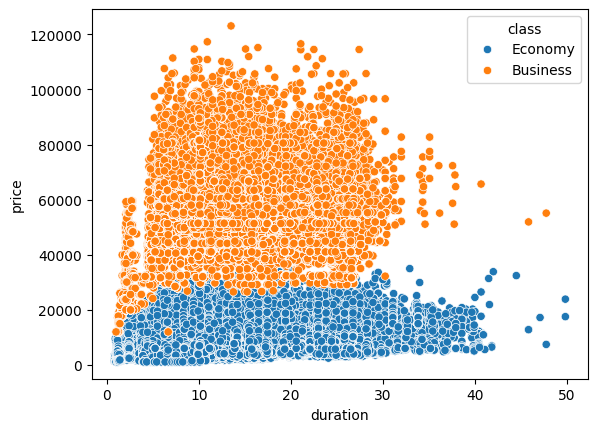

In [22]:
sns.scatterplot(x=df['duration'],y=df['price'],hue=df['class'])

### price trends by category 

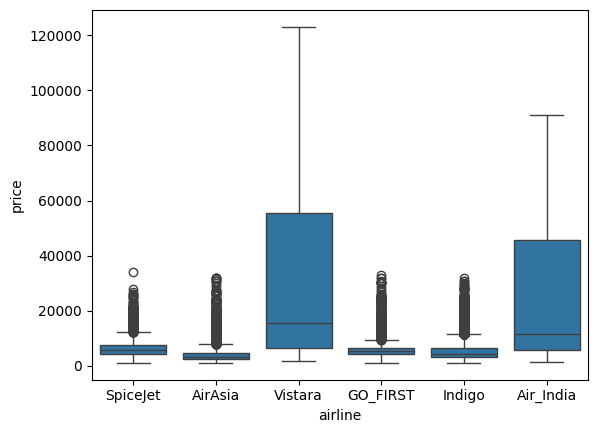

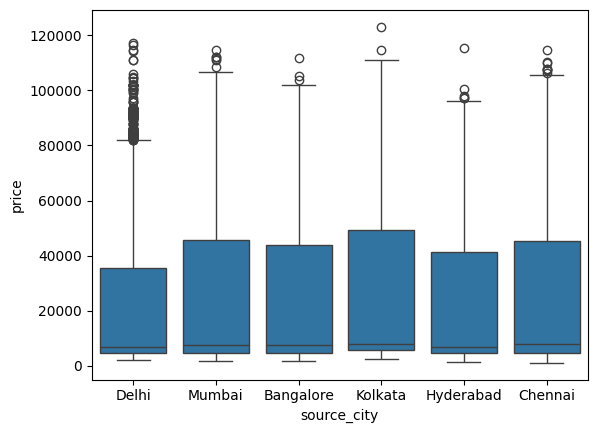

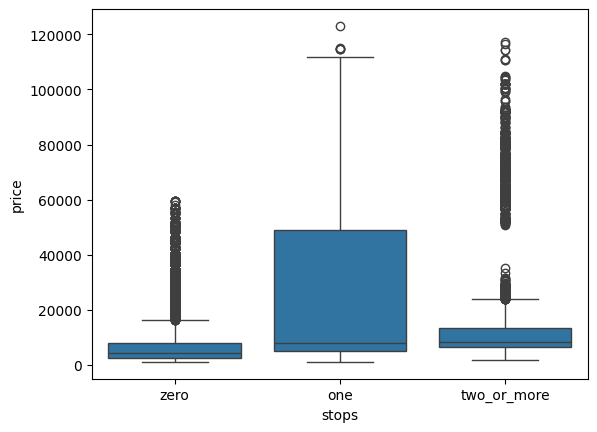

In [23]:
sns.boxplot(x=df['airline'],y=df['price'])
plt.show()
sns.boxplot(x=df['source_city'],y=df['price'])
plt.show()
sns.boxplot(x=df['stops'],y=df['price'])
plt.show()

### freq counts

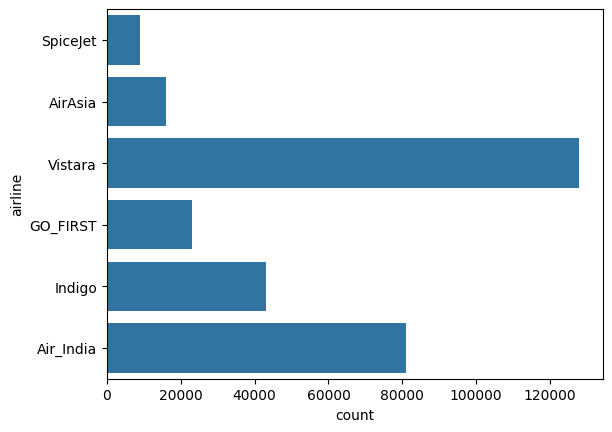

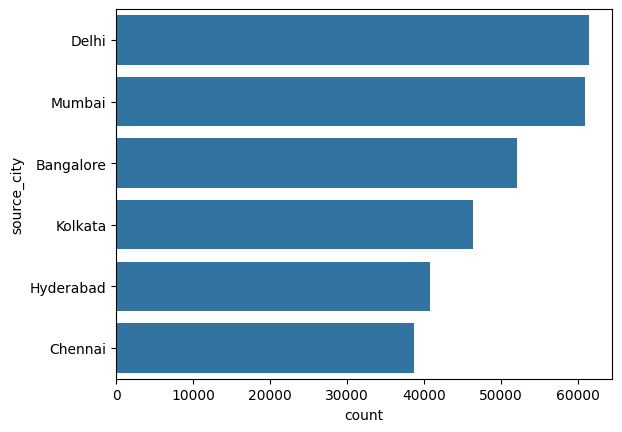

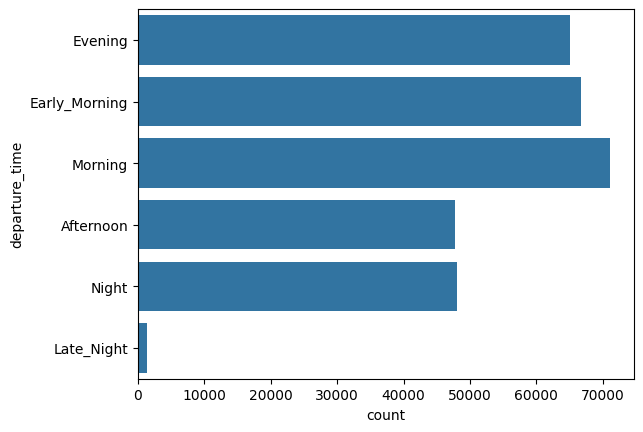

In [24]:
sns.countplot(df['airline'])
plt.show()
sns.countplot(df['source_city'])
plt.show()
sns.countplot(df['departure_time'])
plt.show()


### grouped Statistics

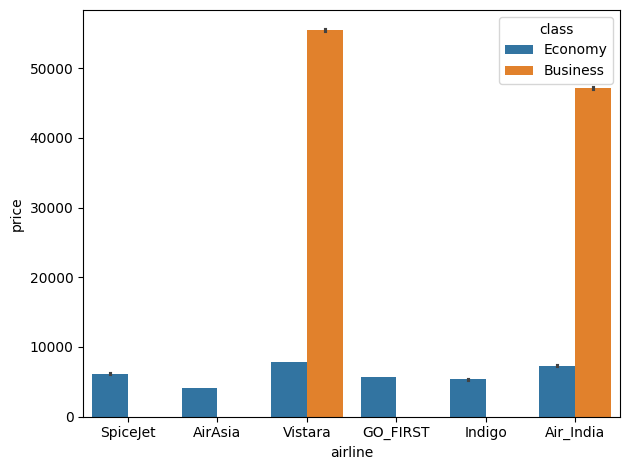

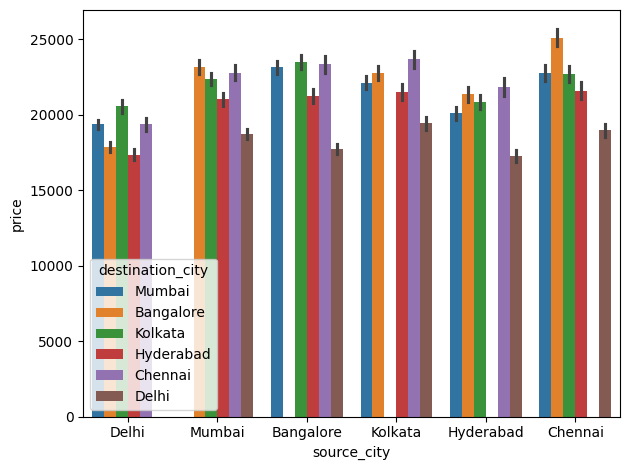

In [25]:
plt.Figure(figsize=(12,6))
sns.barplot(x=df['airline'],y=df['price'],hue=df['class'])
plt.tight_layout()
plt.show()

plt.Figure(figsize=(12,6))
sns.barplot(x=df['source_city'],y=df['price'],hue=df['destination_city'])
plt.tight_layout()
plt.show()


### mixed Insights

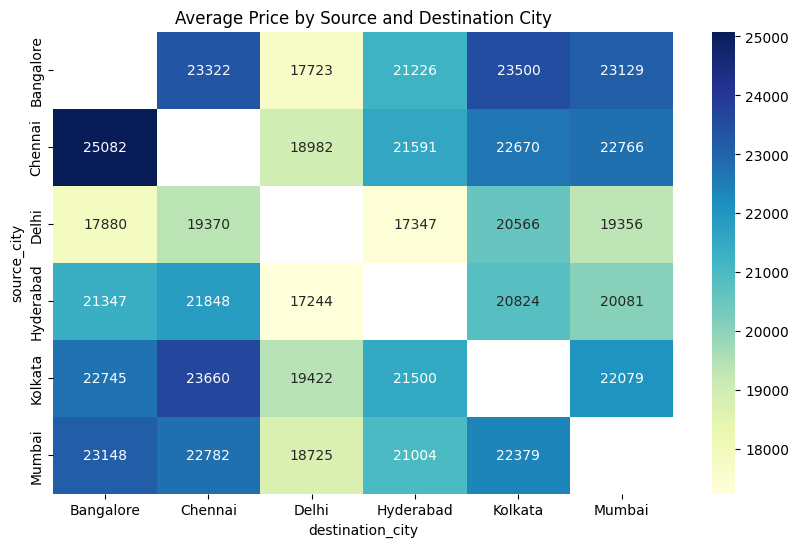

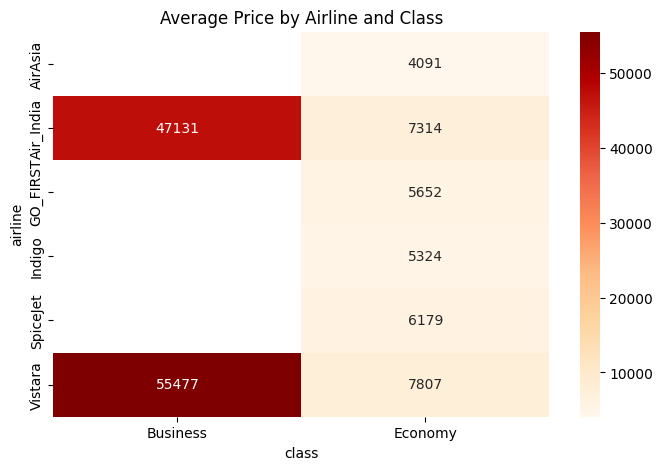

<Axes: >

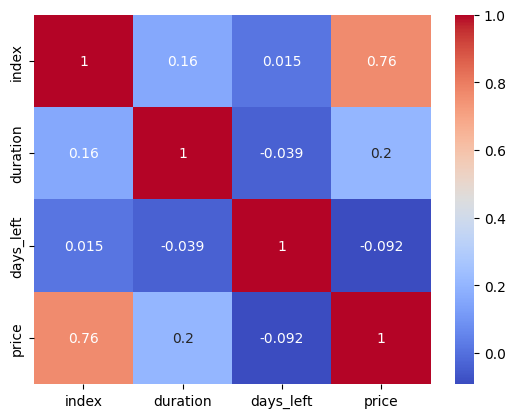

In [26]:

pivot_city = df.pivot_table(index='source_city', columns='destination_city', values='price', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot_city, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Price by Source and Destination City")
plt.show()

pivot_airline_class = df.pivot_table(index='airline', columns='class', values='price', aggfunc='mean')
plt.figure(figsize=(8,5))
sns.heatmap(pivot_airline_class, annot=True, fmt=".0f", cmap="OrRd")
plt.title("Average Price by Airline and Class")
plt.show()


sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

# Data Preprocessing 



## encoding categorical features

In [27]:
df.head(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [28]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

LabelEncoder=LabelEncoder()
df['Class_Encoded']=LabelEncoder.fit_transform(df['class'])




In [29]:
OneHotEncoder=OneHotEncoder(sparse_output=False)
encoded_airline=OneHotEncoder.fit_transform(df[['airline']])
encoded_df=pd.DataFrame(encoded_airline,columns=OneHotEncoder.get_feature_names_out(['airline']))
df=pd.concat([df,encoded_df],axis=1)

In [39]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder=OneHotEncoder(sparse_output=False)
encoded_source_city=OneHotEncoder.fit_transform(df[['source_city']])
encoded_df=pd.DataFrame(encoded_source_city,columns=OneHotEncoder.get_feature_names_out(['source_city']))
df=pd.concat([df,encoded_df],axis=1)

In [42]:
encoded_departure_time=OneHotEncoder.fit_transform(df[['departure_time']])
encoded_df=pd.DataFrame(encoded_departure_time,columns=OneHotEncoder.get_feature_names_out(['departure_time']))
df=pd.concat([df,encoded_df],axis=1)

In [44]:
encoded_stops=OneHotEncoder.fit_transform(df[['stops']])
encoded_df=pd.DataFrame(encoded_stops,columns=OneHotEncoder.get_feature_names_out(['stops']))
df=pd.concat([df,encoded_df],axis=1)

In [46]:
encoded_arrival_time=OneHotEncoder.fit_transform(df[['arrival_time']])
encoded_df=pd.DataFrame(encoded_arrival_time,columns=OneHotEncoder.get_feature_names_out(['arrival_time']))
df=pd.concat([df,encoded_df],axis=1)

In [48]:
encoded_destination_city=OneHotEncoder.fit_transform(df[['destination_city']])
encoded_df=pd.DataFrame(encoded_destination_city,columns=OneHotEncoder.get_feature_names_out(['destination_city']))
df=pd.concat([df,encoded_df],axis=1)

In [49]:
df.head(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Transformation

In [51]:
from sklearn.preprocessing import PowerTransformer
log_trans=PowerTransformer(method='yeo-johnson')
df['price_log']=log_trans.fit_transform(df[['price']])


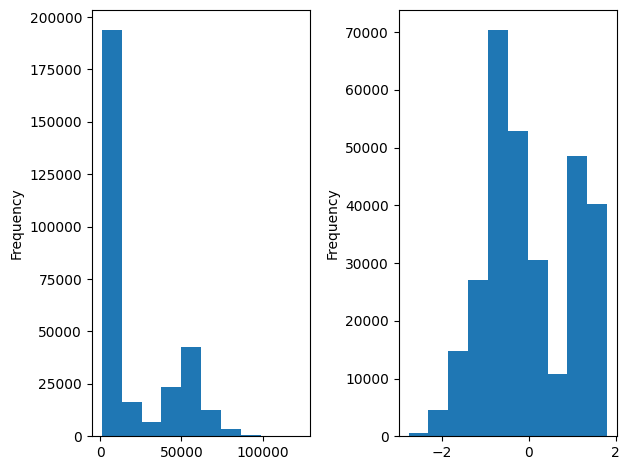

In [53]:
plt.subplot(1,2,1)
df['price'].plot(kind='hist')
plt.subplot(1,2,2)
df['price_log'].plot(kind='hist')

plt.tight_layout()

## scaling numeric features

In [54]:
df.head(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,...,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,price_log
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.501744
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.501744
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.501198
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.501380
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.501380


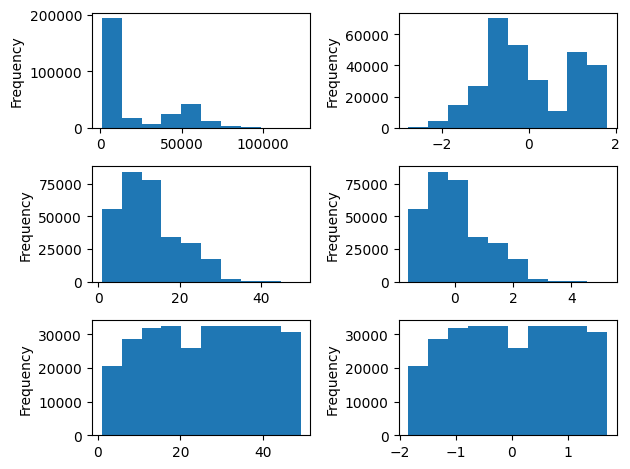

In [58]:
from sklearn.preprocessing import StandardScaler
StandardScale=StandardScaler()

df[['duration_Standardized','days_left_Standardized']]=StandardScale.fit_transform(df[['duration','days_left']])

plt.subplot(3,2,1)
df['price'].plot(kind='hist')
plt.subplot(3,2,2)
df['price_log'].plot(kind='hist')

plt.subplot(3,2,3)
df['duration'].plot(kind='hist')
plt.subplot(3,2,4)
df['duration_Standardized'].plot(kind='hist')

plt.subplot(3,2,5)
df['days_left'].plot(kind='hist')
plt.subplot(3,2,6)
df['days_left_Standardized'].plot(kind='hist')

plt.tight_layout()

In [59]:
df.head(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,...,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,price_log,duration_Standardized,days_left_Standardized
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.501744,-1.397531,-1.843875
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.501744,-1.375284,-1.843875
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.501198,-1.397531,-1.843875
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.501380,-1.386407,-1.843875
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.501380,-1.375284,-1.843875


# OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset

## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*
